# Driver of LIM

## Import Modules

In [1]:
# import modules
import math
import numpy as np
import os

import matplotlib as mpl
mpl.rc('image', cmap='jet')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
# %matplotlib inline

from lim_mod import LIM, LIMOptim

## Data

In [2]:
# data
if False:
    # red noise
    from ode_AM_index_config import get_red_noise as get_data
    gamma = [0.06]
    true_t, true_y = get_data(gamma=gamma, data_size=10000)
else:
    # annular mode
    from read_AM_index_mod import get_AM_index as get_data
    t, y, p = get_data()

print(f't.shape = {t.shape}, y.shape = {y.shape}')
# plot(true_y)


Reading from saved data ......
Use pressure levels = [   1.    2.    3.    5.    7.   10.   20.   30.   50.   70.  100.  125.
  150.  175.  200.  225.  250.  300.  350.  400.  450.  500.  550.  600.
  650.  700.  750.  775.  800.  825.  850.  875.  900.  925.  950.  975.
 1000.]

t.shape = (21535,), y.shape = (21535, 37)


## Model

In [3]:
# # testing the number of svd trunctions
# # to make sure the norm of B is not singular
# lag = 10
# B_threshold = 0
# lim = LIMOptim(y, lag=lag, lag_val=30, B_threshold=B_threshold, verbose=True)
# model = lim.model

lag = 10
model = LIM(y, lag=lag, verbose=False)

lag_time = 90
yf = model.forecast(y[:-lag_time], t[:lag_time+1])
print(f"\ny(t, x) = {y.shape}")
print(f"yf(lag, batch, x) = {yf.shape}")


y(t, x) = (21535, 37)
yf(lag, batch, x) = (91, 21445, 37)


## Plot the linear operator 

Ct = (37, 37)
Ctf = (37, 37)


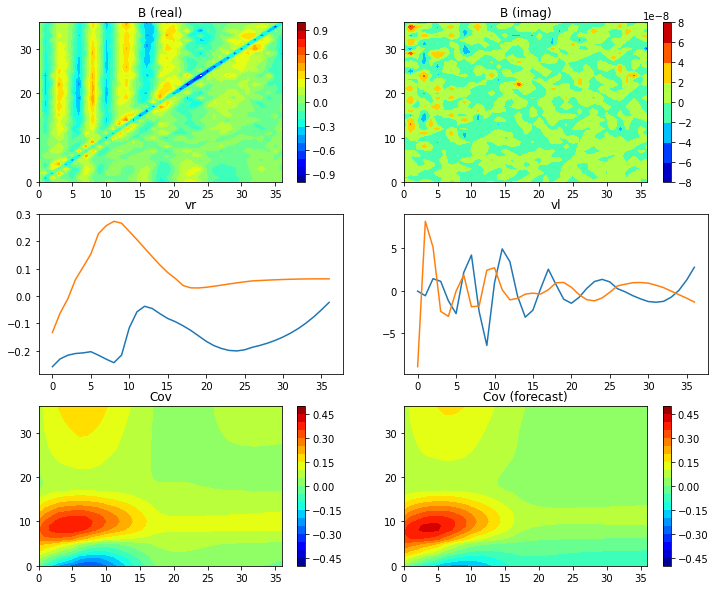

In [4]:
val_time = 30
Ct = y[val_time:].T @ y[:-val_time] / (len(y)-val_time)
Ctf = yf[val_time,:,:].T @ yf[0,:,:] / yf.shape[1]
print(f"Ct = {Ct.shape}")
print(f"Ctf = {Ctf.shape}")

fig = plt.figure(figsize=(12,10))
cmax = 1
ax = fig.add_subplot(3,2,1)
plt.contourf(model.B.real, np.linspace(-cmax, cmax, 21))
plt.title('B (real)')
plt.colorbar()

ax = fig.add_subplot(3,2,2)
plt.contourf(model.B.imag)
plt.title('B (imag)')
plt.colorbar()

ax = fig.add_subplot(3,2,3)
plt.plot(model.vr.real[:,:2])
plt.title('vr')

ax = fig.add_subplot(3,2,4)
plt.plot(model.vl.real[:,:2])
plt.title('vl')

cmax = 0.5
ax = fig.add_subplot(3,2,5)
plt.contourf(Ct, np.linspace(-cmax, cmax, 21))
plt.title('Cov')
plt.colorbar()

ax = fig.add_subplot(3,2,6)
plt.contourf(Ctf, np.linspace(-cmax, cmax, 21))
plt.title('Cov (forecast)')
plt.colorbar()

## Plot autocovariance

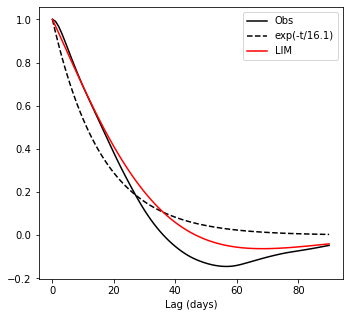

In [5]:
from AM_plot_mod import plot_cov

k = np.isin(p, 10).nonzero()[0][0]
plot_cov(y, yf=yf, k=k, lag_time=lag_time)


## Plot lagged covariance

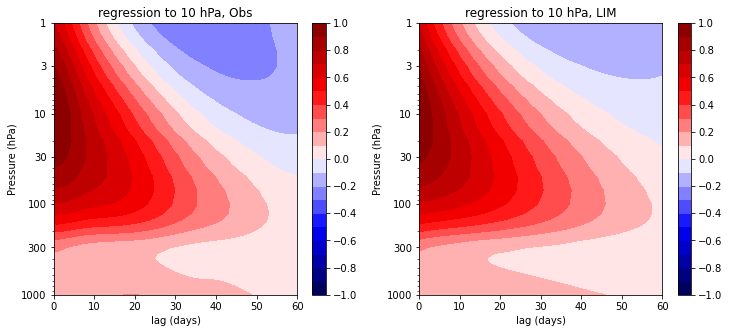

In [6]:
from AM_plot_mod import plot_lag_reg

plot_lag_reg(y, p, yf)

## Make composite for strong and weak vortex events


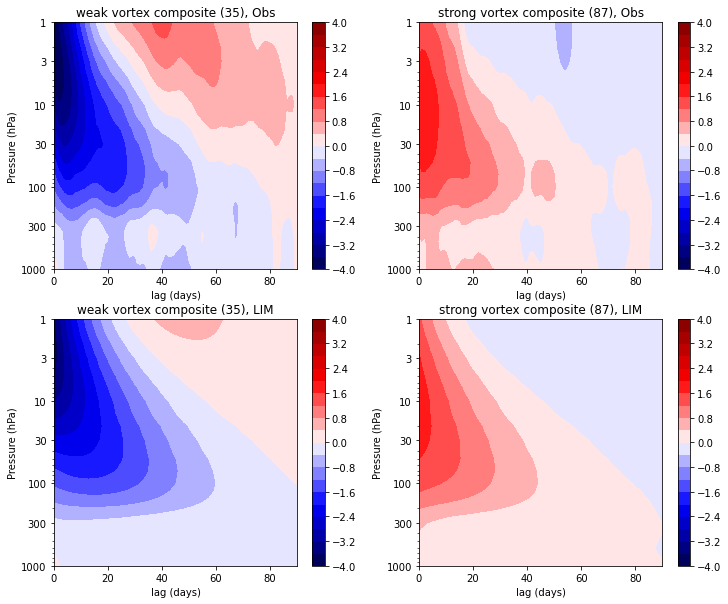

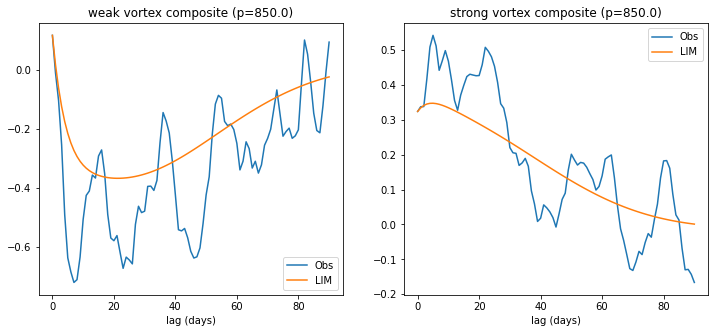

In [7]:
from AM_plot_mod import plot_event

plot_event(y, p, yf=yf, lag_time=lag_time)
